In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
# green_path = '/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_green'
# orange_path = '/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange'
# purple_path = '/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_purple'

green_path = '/media/mb/Dev/workspace/dynapse/onchip_experimentaldata/board_green'
orange_path = '/media/mb/Dev/workspace/dynapse/onchip_experimentaldata/board_orange'


# Refractory period

In [ ]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
dir_path = f'../onchip_experimentaldata/board_orange/2022-10-10/Refactory_period/16-15/'
data_path = f'{dir_path}/data'
img_path = f'{dir_path}/img'
netfnames = glob.glob(f"{data_path}/Network_*.h5",recursive=True)
with pd.HDFStore(netfnames[0]) as store:
    key = store.keys()[0]
    dfnetwork = store.get(key)


fnames = glob.glob(f"{data_path}/NeuronDynamics*.h5",recursive=True)
print(fnames)  
df_ISI = pd.DataFrame()
df_Spikes = pd.DataFrame()
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        df_data = store.get(key)

        dfisi = pd.DataFrame()
        fine_values = df_data.Fine.unique()
        for fine in fine_values:
            print(f'------------------------------{fine}------------------------------------')
            df = df_data[df_data.Fine == fine]
            active_neurons = df.Id.unique()
            for neuronId in active_neurons:
                Type = dfnetwork[dfnetwork.Id == neuronId].Type.values[0]
                spikes = df[df.Id == neuronId].sort_values('Timestamp').Timestamp.values            
                mean_isi =np.mean(np.diff(spikes))
                isi =np.diff(spikes)
                dict_isi = dict(NeuronId = len(isi)*[neuronId],  ISI = isi* 1e3, Type=len(isi)*[Type],Fine = fine,Coarse=df_data.coarse.unique()[0] )
                # print(dict_spikes)
                dfisi = pd.concat([dfisi,pd.DataFrame(dict_isi)],ignore_index=True)
            df_ISI = pd.concat([df_ISI,dfisi],ignore_index=True)

display(df_ISI)


# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(20,10))

# sns.lineplot(data= df_FR,x="FineVal",y="fr",hue="Type",style="NeuronId")

# plt.show()#savefig(f"../data/board_orange/2022-08-07/RefP/14-37/reP.svg")
# plt.close(figA)

In [ ]:
figA = plt.figure(figsize=(10,6))

spike_time = df_data[(df_data.Id == 320) & (df_data.Fine == 10)].Timestamp.values * 1e3
print(np.diff(spike_time),spike_time)
plt.scatter(spike_time,len(spike_time) * [1], marker = '|')
plt.show()
plt.close(figA)

figA = plt.figure(figsize=(10,6))

spike_time = df_data[(df_data.Id == 303) & (df_data.Fine == 10)].Timestamp.values * 1e3
plt.scatter(spike_time,len(spike_time) * [1], marker = '|')
plt.show()
plt.close(figA)



In [ ]:
sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(20,20))

g = sns.FacetGrid(df_ISI_C2sm[df_ISI_C2sm.Fine<110], row='Type',col='Fine',hue='Type', margin_titles=True,sharex=False,xlim=(0,6))
g.map_dataframe(sns.histplot, x="ISI",binwidth=0.05,stat='percent')#, y="tip")
# plt.xlim(0,100)
plt.show()#savefig(f"../data/board_orange/2022-08-07/RefP/14-37/reP.svg")
# plt.close(figA)
plt.close()

# Firing rate

In [ ]:

# netfnames = glob.glob(f"{data_path}/Network_*.h5",recursive=True)
# with pd.HDFStore(netfnames[0]) as store:
#     key = store.keys()[0]
#     dfnetwork = store.get(key)

data_path =f'{orange_path}/2023-03-20/EI_homeostasis_MEMORY/12-47/data'
fnames = glob.glob(f"{data_path}/NetworkActivity*.h5",recursive=True)
print(fnames)  

with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        iteration = int(key.replace('/','').split('_')[1])
        repeat = int(key.replace('/','').split('_')[-1])
        print(iteration,repeat)
        df = store.get(key).reset_index()       
        df_fr = pd.DataFrame()
        active_neurons = df.Id.unique()
        # print(active_neurons)
        for neuronId in active_neurons:
            spikes = df[df.Id == neuronId].sort_values('Timestamp').Timestamp.values
            Type = df[df.Id == neuronId].Type.unique()[0]
            duration = max(spikes)-min(spikes)
            dict_fr = dict( NeuronId = neuronId, fr = len(spikes),duration = duration, Repeat = repeat, Type=Type, Iteration = iteration)
            df_fr = pd.concat([df_fr,pd.DataFrame(dict_fr,index=[0])],ignore_index=True)
        df_fr.to_hdf(f'{data_path}/DC_FrequencyNeuron_wise.h5',append=True,key=f'Neuron_wise')


In [ ]:
df_dur = pd.read_hdf(f'{data_path}/DC_FrequencyNeuron_wise.h5',key=f'Neuron_wise')
df_dur.sort_values([''])

In [ ]:
%matplotlib widget
plt.ioff()

figA = plt.figure(figsize=(15,10))

df_dur = df_dur.astype({"Iteration": int, "Repeat": int, "duration": float, "fr": float, "NeuronId": int})
df_dur.dtypes
df = df_dur[ df_dur.Type == 'Pyr']
df = df.groupby(['Repeat','Iteration']).describe()['duration'][['max']].reset_index()
sns.scatterplot(data= df,x ='Iteration',y='max',s=5,edgecolor=None)
plt.show()
plt.close(figA)
plt.ion()



In [ ]:
df_dur = pd.read_hdf(f'{data_path}/DC_FrequencyNeuron_wise.h5',key=f'Neuron_wise')
# g = sns.FacetGrid(data=df_dur[df_dur.Type == 'Pyr'],height=6,aspect=1.5, col = 'Repeat',col_wrap=2)
# g.map_dataframe(sns.scatterplot,x='Iteration',y = 'duration')
df_dur.Iteration.unique()

In [ ]:
df_FR = df_FR.astype({"Input": int}).sort_values(by=['Input'])

sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks')
figA = plt.figure(figsize=(20,10))

sns.lineplot(data= df_FR,x="Input",y="fr",hue="Type",err_style="bars")

plt.savefig(f"{img_path}/DC-Freq.svg")
plt.close(figA)

# Interspike-interval

In [ ]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
dir_path = f'{orange_path}/2022-10-10/Refactory_period/16-15/'
data_path = f'{dir_path}/data'
img_path = f'{dir_path}/img'
netfnames = glob.glob(f"{data_path}/Network_*.h5",recursive=True)
with pd.HDFStore(netfnames[0]) as store:
    key = store.keys()[0]
    dfnetwork = store.get(key)

fnames = glob.glob(f"{data_path}/NeuronDynamics*.h5",recursive=True)
print(fnames)  
df_ISI = pd.DataFrame()
df_Spikes = pd.DataFrame()
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        df_data = store.get(key)
        print(df_data.head())
        dfisi = pd.DataFrame()
        fine_values = df_data.Fine.unique()
        for fine in fine_values:
            print(f'------------------------------{fine}------------------------------------')
            df = df_data[df_data.Fine == fine]
            active_neurons = df.Id.unique()
            for neuronId in active_neurons:
                Type = dfnetwork[dfnetwork.Id == neuronId].Type.values[0]
                spikes = df[df.Id == neuronId].sort_values('Timestamp').Timestamp.values            
                mean_isi =np.mean(np.diff(spikes))
                isi =np.diff(spikes)
                dict_isi = dict(NeuronId = len(isi)*[neuronId],  ISI = isi* 1e3, Type=len(isi)*[Type],Fine = fine,Coarse=df_data.coarse.unique()[0] )
                # print(dict_spikes)
                dfisi = pd.concat([dfisi,pd.DataFrame(dict_isi)],ignore_index=True)
            df_ISI = pd.concat([df_ISI,dfisi],ignore_index=True)

display(df_ISI)


# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(20,10))

# sns.lineplot(data= df_FR,x="FineVal",y="fr",hue="Type",style="NeuronId")

# plt.show()#savefig(f"../data/board_orange/2022-08-07/RefP/14-37/reP.svg")
# plt.close(figA)

In [ ]:
dfnetwork

In [ ]:
sns.histplot(df_ISI.reset_index(drop=True), x="ISI", binwidth=0.05,stat='percent').set(xlim=(0,10))


# ax2 = ax_hist.inset_axes([0.3, .5, 0.2, .2], facecolor='lightgrey')
# sns.histplot(isi_DF.reset_index(drop=True), x="inter_spike", binwidth=.05,stat='percent',ax=ax2)
# ax2.set_title('Zoom in')
# ax2.set_xlabel('Time (msec)', fontsize=10)
# ax2.set_ylabel('Percent (%)', fontsize=10)
# ax2.set_xlim([isi_DF.inter_spike.min()-0.1,isi_DF.inter_spike.max()+0.1])

In [ ]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
data_path = "../onchip_experimentaldata/board_orange/2022-10-11/DC_FF_curve/15-46/data"
netfnames = glob.glob(f"{data_path}/Network_DC_*.h5",recursive=True)
with pd.HDFStore(netfnames[0]) as store:
    key = store.keys()[0]
    dfnetwork = store.get(key)


fnames = glob.glob(f"{data_path}/NetworkActivity_DC_*.h5",recursive=True)
print(fnames)  
df_ISI = pd.DataFrame()
df_Spikes = pd.DataFrame()
df_FR = pd.DataFrame()
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        trial = 0#key.replace('/','').split('_')[1]
        iteration = 0#key.replace('/','').split('_')[-1]
        df = store.get(key)
        
        dfisi = pd.DataFrame()
        dfspikes = pd.DataFrame()
        df_fr = pd.DataFrame()
        active_neurons = df.Id.unique()
        print(active_neurons)
        for neuronId in active_neurons:
            
            Type = dfnetwork[dfnetwork.Id == neuronId].Type.values[0]

            spikes = df[df.Id == neuronId].sort_values('Timestamp').Timestamp.values
            
            dict_fr = dict(NeuronId = neuronId,  fr = len(spikes), Iteration = iteration,Type=Type, Trial = trial)
            df_fr = pd.concat([df_fr,pd.DataFrame(dict_fr,index=[0])],ignore_index=True)
            df_FR = pd.concat([df_FR,df_fr],ignore_index=True)

            # mean_isi =np.mean(np.diff(spikes))
            # isi =np.diff(spikes)
            # dict_isi = dict(NeuronId = len(isi)*[neuronId],  ISI = isi, Iteration = len(isi)*[iteration],Type=len(isi)*[Type], Trial = len(isi)*[trial])
            dict_spikes = dict(NeuronId = len(spikes)*[neuronId],  spikes = spikes, Iteration = len(spikes)*[iteration],Type=len(spikes)*[Type], Trial = len(spikes)*[trial])
            # print(dict_spikes)
            # dfisi = pd.concat([dfisi,pd.DataFrame(dict_isi)],ignore_index=True)
            dfspikes = pd.concat([dfspikes,pd.DataFrame(dict_spikes)],ignore_index=True)
        # df_ISI = pd.concat([df_ISI,dfisi],ignore_index=True)
        df_Spikes = pd.concat([df_Spikes,dfspikes],ignore_index=True)
# df_ISI = df_ISI.astype({"Iteration": int})
# df_ISI
# df_Spikes = df_Spikes.astype({"Iteration": int, "Trial": int})
df_FR #= df_FR.astype({"FineVal": int})

# df_Spikes

# sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="bright",style='ticks',color_codes = True )
# figA = plt.figure(figsize=(20,10))

# sns.lineplot(data= df_FR,x="FineVal",y="fr",hue="Type",style="NeuronId")

# plt.show()#savefig(f"../data/board_orange/2022-08-07/RefP/14-37/reP.svg")
# plt.close(figA)

# DC-Freq curve

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format='retina'
# subject_id = 2
dir_path = f"{green_path}/2024-02-16/IF_curve/11-41"
data_path =f"{dir_path}/data"
img_path =f"{dir_path}/img"
with pd.HDFStore(f'{data_path}/DC_Frequency.h5') as store:
    print(store.keys())
    key = store.keys()[0]
    df_IF = store.get(key)

sns.lineplot(data=df_IF.reset_index(drop=True),x='Input',y='FiringRate',hue='Type',palette='Set1')#.set(xlim=(0,50))
plt.show()
plt.close()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format='retina'
# subject_id = 2
dir_path = "/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_orange/2022-11-04/EI_persistancy/21-43"
data_path =f"{dir_path}/data"
img_path =f"{dir_path}/img"
with pd.HDFStore(f'{data_path}/DC_FrequencyNeuron_wise.h5') as store:
    key = store.keys()
    print(key)

# sns.lineplot(data=df_IF,x='Input',y='FiringRate',hue='Type')#.set(xlim=(0,50))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
%config InlineBackend.figure_format='retina'
# subject_id = 2
dir_path = "/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_green/2022-11-08/EI_homeostasis_paradoxical/15-09"

data_path =f"{dir_path}/data"
img_path =f"{dir_path}/img"
df_firingRate =pd.DataFrame()
with pd.HDFStore(f'{data_path}/NetworkActivity_EI_homeostasis_paradoxical.h5') as store:
    key = store.keys()[0]
    # print(store.keys())
    df_firingRate = store.get(key).reset_index()

df_firingRate

In [ ]:
df_Pyr = df_firingRate[ (df_firingRate.Type == 'Pyr') ]
df_PV = df_firingRate[ (df_firingRate.Type == 'PV') ]

bins = np.arange(0.,1.,0.05)
def get_firing_rate(ti):
    #IMPORTANT: CHECK UNITS
    hists,_ =np.histogram(ti,bins=bins)
    fireRate= np.zeros(len(bins))
    idx_count=1
    for n in hists:
        fireRate[idx_count] = n / 0.05 
        idx_count+=1
    # print(fireRate)
    return np.mean(fireRate)

df_fr_Pyr = df_Pyr.groupby(['Id','Repeat'])['Timestamp'].agg(get_firing_rate)
df_fr_Pyr
df_fr_PV = df_PV.groupby(['Id','Repeat'])['Timestamp'].agg(get_firing_rate)


sns.lineplot(data = df_fr_Pyr.reset_index(),x='Repeat',y='Timestamp',hue='Id',palette='Reds',legend=False)

# g = sns.lineplot(data = df_fr_PV.reset_index(),x='Repeat',y='Timestamp',hue='Id',palette='Blues',legend=False)
# g.set(xlabel ='Input (a.u.)',ylabel='Firing rate (Hz)')
# plt.show()
# plt.close()

In [ ]:
plt.ioff()

figA = plt.figure(figsize=(6,6),dpi=100)
sns.lineplot(data= df,x="Input",y="FiringRate",style="Repeat",hue="Type").set(xlabel='DC Coarse 2', ylabel = 'Firing rate in Hz')#,xlim=(0,250),ylim=(0,250))
# plt.axis('equal')
# plt.savefig(f"{img_path}/Input_Frequency.svg",facecolor = 'white')
plt.show()

plt.close(figA)
plt.ion()

# Raster plots

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
%config InlineBackend.figure_format='retina'

dir_path = f'{orange_path}/2024-05-26/EI_homeostasis_highall/13-14'
data_path = f'{dir_path}/data'
# /media/mb/Dev/workspace/dynapse/onchip_experimentaldata/board_orange/2024-05-25/EI_homeostasis_highall/21-37
img_path = f"{dir_path}/img"

fnames = glob.glob(f"{data_path}/NetworkActivity_*.h5",recursive=True)

df_network_activity = pd.DataFrame()
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        print(key)
        # Iteration = key.replace('/','').split('_')[1]
        # repeat = key.replace('/','').split('_')[-1]
        df_network_activity = store.get(key)#.reset_index()
        # df_events['Iteration'] = Iteration
        # df_events['Repeat'] = repeat
        # df_network_activity = pd.concat([df_network_activity,df_events],ignore_index=True)
# os.makedirs(f"{img_path}/raster_plots",exist_ok=True)   
# plot_events(df_network_activity,img_path=img_path)

df_network_activity

/EI_homeostasis_highall


,Id,Timestamp,Type,Iteration,Repeat
0,0,0.000000,Input,0,0
1,0,0.010000,Input,0,0
2,166,0.011205,Cluster_0_Pyr,0,0
3,157,0.011699,Cluster_0_Pyr,0,0
4,143,0.011913,Cluster_0_Pyr,0,0
...,...,...,...,...,...
37137,114,5.352942,Cluster_0_Pyr,17,4
37138,21,5.352988,Cluster_0_Pyr,17,4
37139,57,5.353174,Cluster_0_Pyr,17,4
37140,93,5.353244,Cluster_0_Pyr,17,4


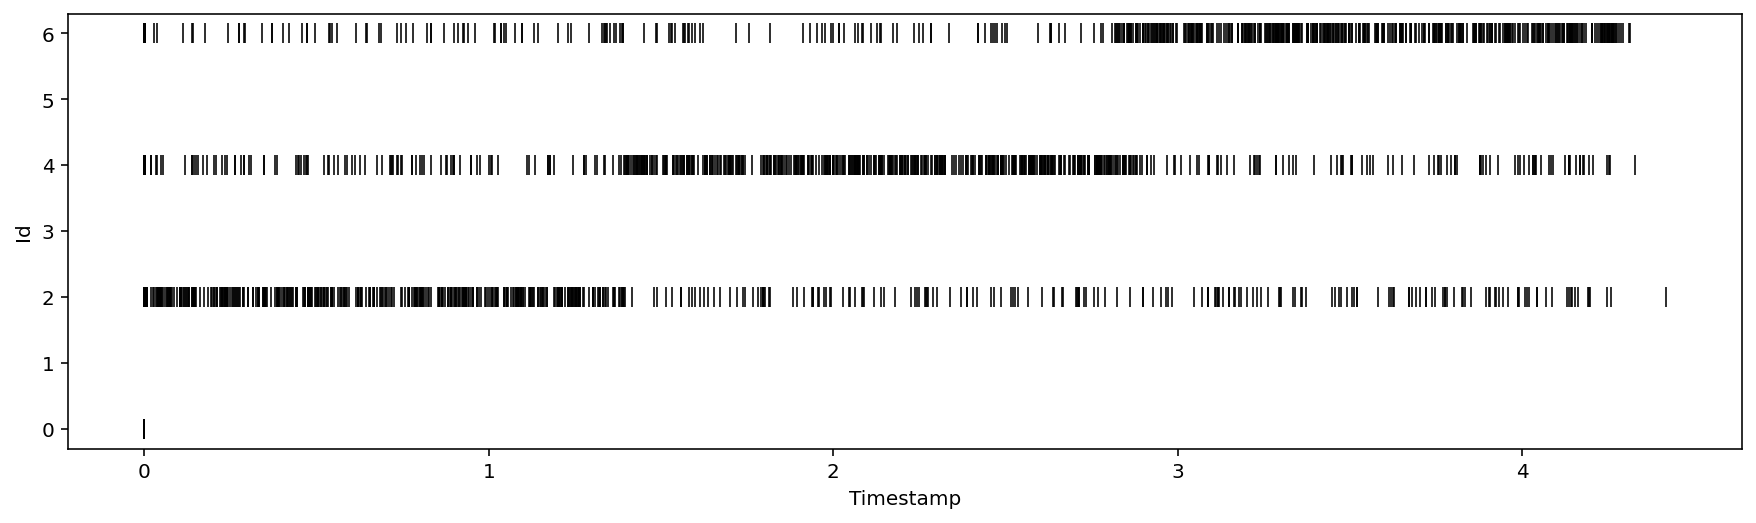

In [4]:
import itertools


df_inp = df_network_activity[(df_network_activity.Type =='Input')& (df_network_activity.Iteration == 17)]
# for i,r in itertools.product(df_inp.Iteration.unique(),df_inp.Repeat.unique()):
_ = plt.figure(figsize=(15,4))
df = df_inp[(df_inp.Repeat == 3)]
sns.scatterplot(data = df,x='Timestamp',y='Id',legend=False, s = 100,marker = '|',color = 'black')
plt.show()
plt.close()

In [5]:
def label_cluster(Id):
    if Id in memory_grp[0]:
        return 'Cluster A'
    elif Id in memory_grp[1]:
        return 'Cluster B'
    elif Id in memory_grp[2]:
        return 'Cluster C'
    else:
        return 'Shared'
    
df_network_activity_filtered =  df_network_activity[df_network_activity.Iteration > 15]
nIds = df_network_activity_filtered[df_network_activity_filtered.Type.str.contains('Pyr')].Id.sort_values().unique()
InpIds = df_network_activity_filtered[df_network_activity_filtered.Type.str.contains('Input')].Id.sort_values().unique()

memory_grp  = np.array_split(nIds,3)
df_network_activity_filtered.loc[:,'Memory'] = 'PV' 
df_network_activity_filtered.loc[df_network_activity_filtered.Id == InpIds[1],'Memory'] = 'Input A'
df_network_activity_filtered.loc[df_network_activity_filtered.Id == InpIds[2],'Memory'] = 'Input B'
df_network_activity_filtered.loc[df_network_activity_filtered.Id == InpIds[3],'Memory'] = 'Input C'
for i,cids in enumerate(memory_grp):
    df_network_activity_filtered.loc[df_network_activity_filtered.Id.isin(cids),'Memory'] = f'Cluster {chr(65+i)}'

/tmp/ipykernel_71457/1987500450.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_network_activity_filtered.loc[:,'Memory'] = 'PV'


In [6]:
import math
def spike_to_rate(spk_count,Ntype,binsize):
   
    if 'Pyr' in Ntype: # per cluster
        N = 50 #200//10 
    elif 'PV' in Ntype:
        N = 50 # total number of PV neurons
    elif 'Input' in Ntype:
        N = 1
    fr = spk_count/(N*binsize)
    if fr == math.nan:    
        print(spk_count,N,binsize)
    return spk_count/(N*binsize)

In [7]:


def calculate_firing_rate(df_spike_data, binsize,offset=0):
    """
    Calculate the firing rate from a given spike data dataframe.

    Parameters:
    - df_spike_data: DataFrame with columns `senders` and `times`.
    - binsize: Size of each time bin (in the same units as the `times` column).

    Returns:
    - df_fr: DataFrame with columns `bins`, `senders`, and `firing rate`.
    """
    
    # Define the time bins
    # for df_spike_data in spike_recorders:
    
    min_time = df_spike_data['Timestamp'].min() + offset
    max_time = df_spike_data['Timestamp'].max()
    bins = np.arange(min_time, max_time + binsize, binsize)
    
    # Bin the times and count the number of spikes in each bin
    df_spike_data['bins'] = pd.cut(
        df_spike_data['Timestamp'], bins, include_lowest=True, right=False, labels=bins[:-1])
    # Group by sender and bins, then count the number of spikes
    print(df_spike_data)
    df_firing_rate = df_spike_data.groupby(['Type', 'bins','Memory']).size().reset_index(name='spike_count')
    # Calculate the firing rate
    print(df_firing_rate)

    df_firing_rate['firing_rate'] = df_firing_rate.apply(lambda df: spike_to_rate(df['spike_count'], df['Type'],binsize), axis=1)
    

    return df_firing_rate[['bins', 'Type', 'spike_count','firing_rate']]



i=17,r=0


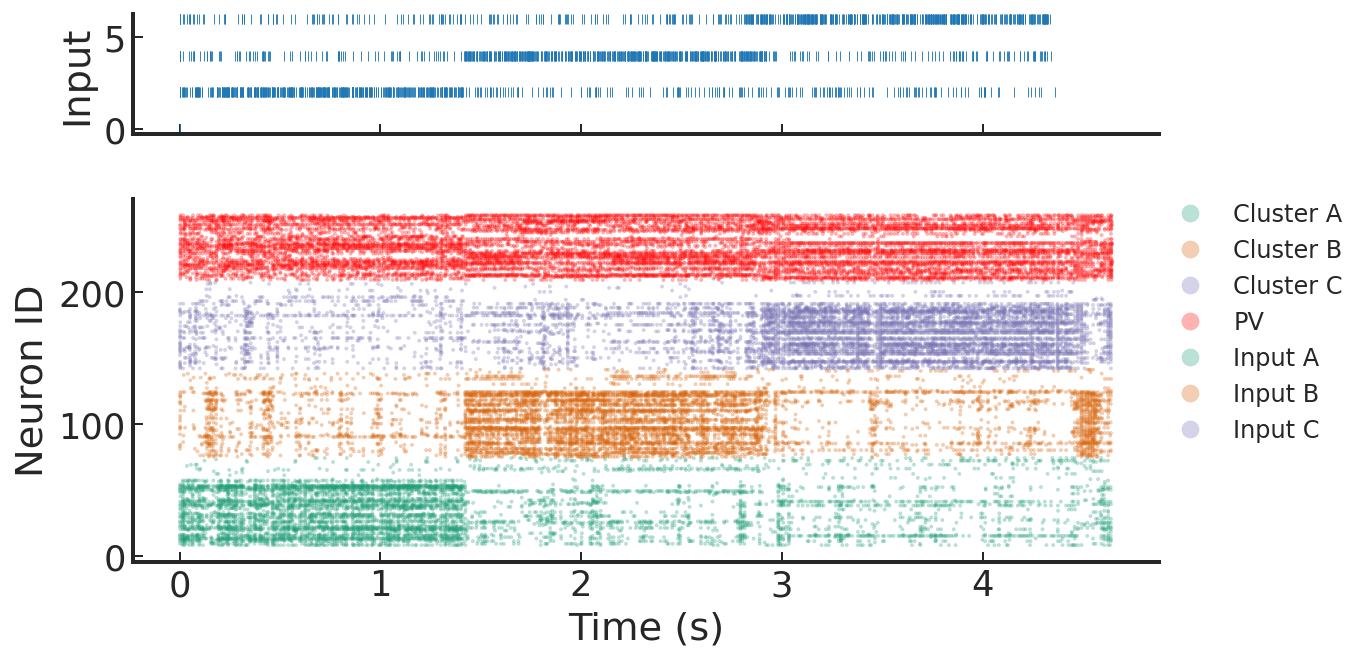

i=17,r=1


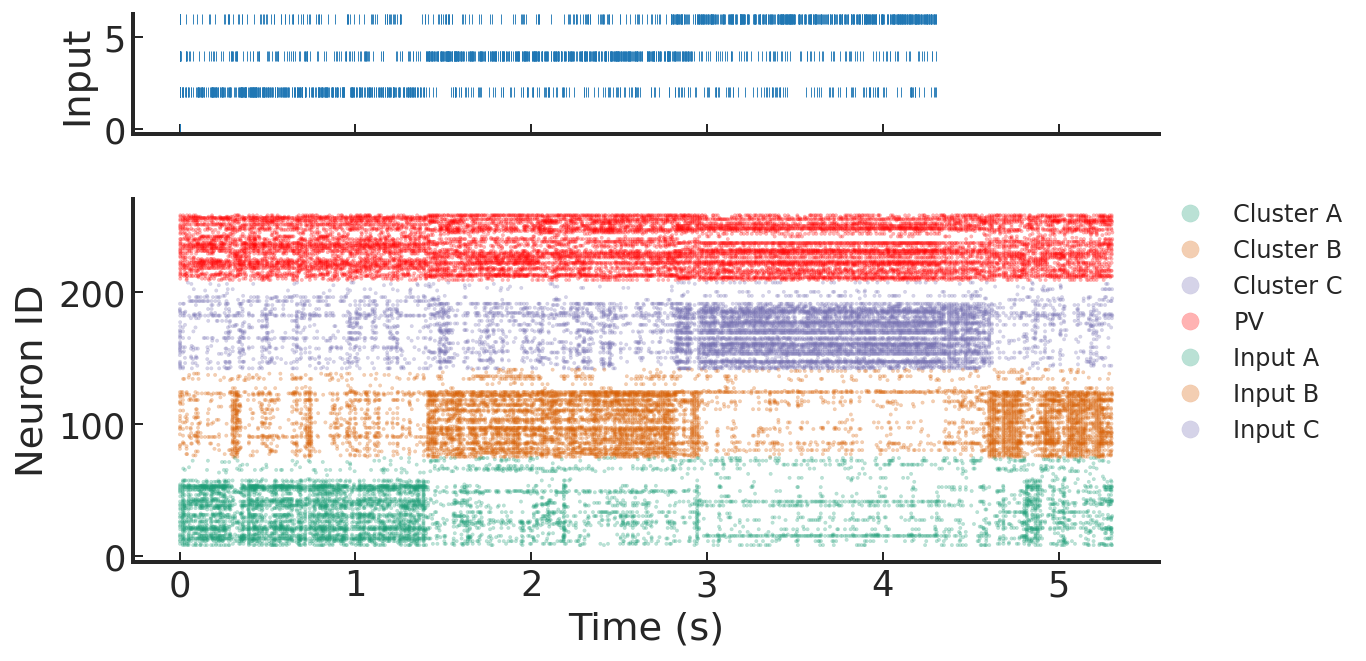

i=17,r=2


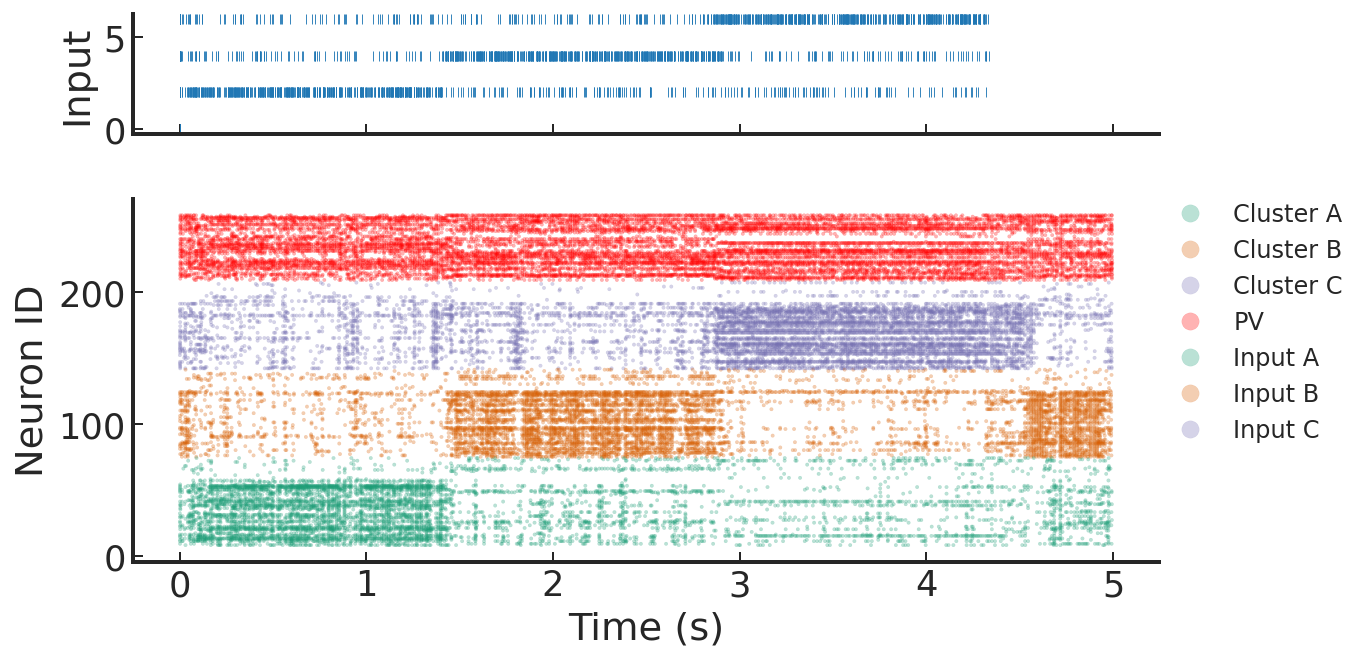

i=17,r=3


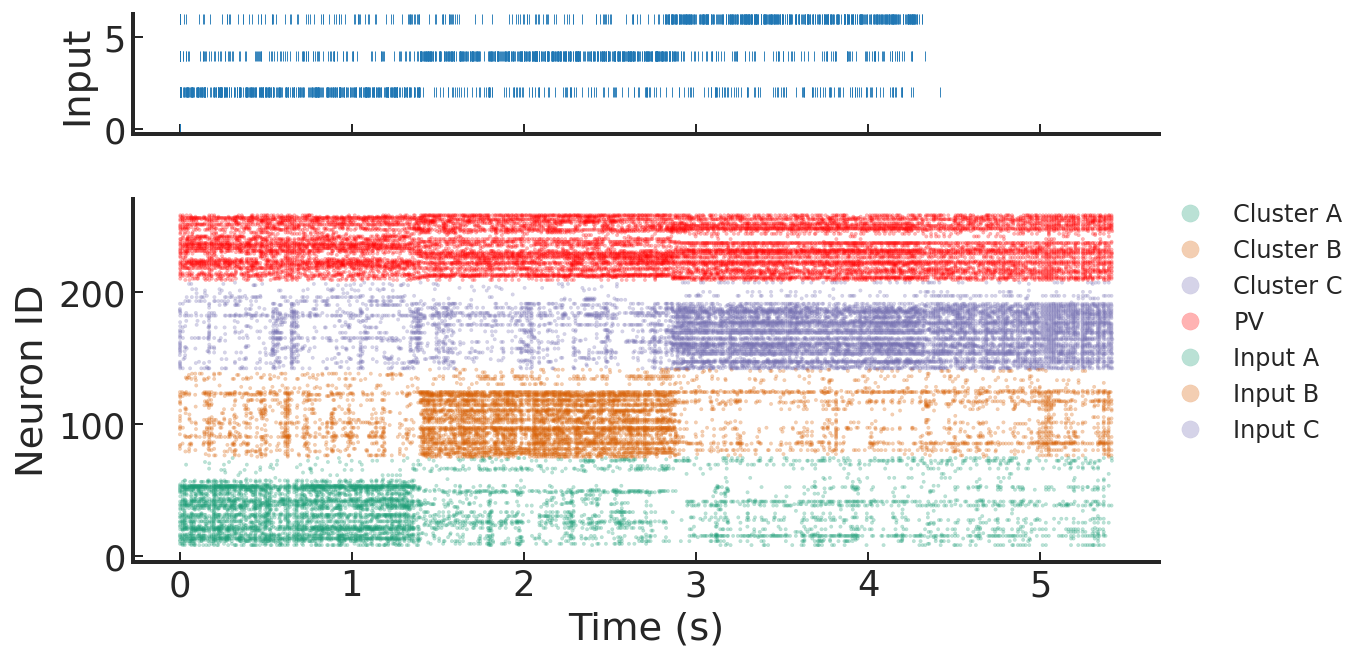

i=17,r=4


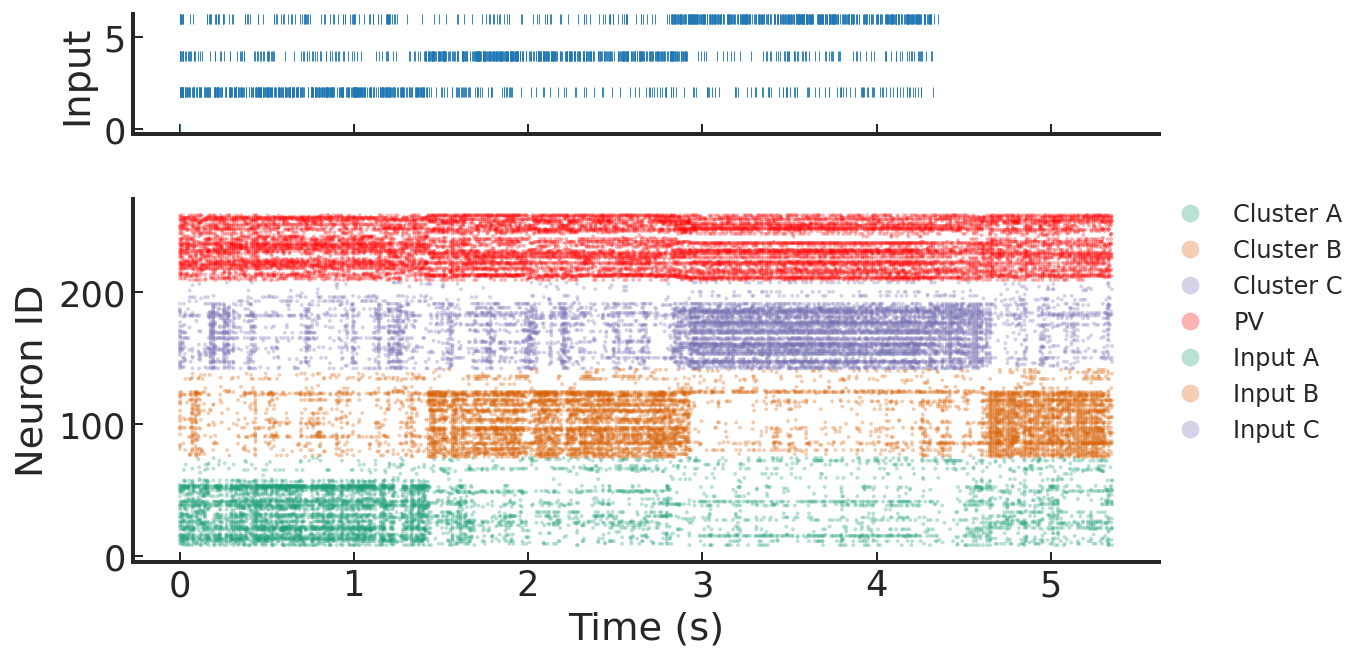

In [23]:
import itertools
import warnings
warnings.filterwarnings('ignore')
binsize = .2
sns.set_style("ticks")
custom_params = {"axes.spines.right": False, "axes.spines.top": False,"lines.linewidth": 2.5}
img_path = f"{dir_path}/img"
sns.set_context("paper", font_scale=2., rc=custom_params)
for i,r in itertools.product(df_network_activity_filtered.Iteration.unique()[1:],df_network_activity_filtered.Repeat.unique()):
    figA, (ax1, ax2) = plt.subplots(2,1,sharex =True,figsize=(10,5),height_ratios=[1,3]) #plt.figure(figsize=(10,5))
    print(f'{i=},{r=}')
    df_spike_data = df_network_activity_filtered[(df_network_activity_filtered.Iteration == i)& (df_network_activity_filtered.Repeat == r)]
    min_time = df_spike_data['Timestamp'].min()
    max_time = df_spike_data['Timestamp'].max()
    bins = np.arange(min_time, max_time + binsize, binsize)
    # bins = np.round(bins, 2).astype(str)
    
    # Bin the times and count the number of spikes in each bin
    df_spike_data.loc[:,'bins'] = pd.cut(
        df_spike_data['Timestamp'], bins, include_lowest=True, right=False, labels=np.around(bins[:-1],2))
    # df_spike_data = df_spike_data[['bins','Memory','Type','Id']]
    # Group by sender and bins, then count the number of spikes
    df_firing_rate = df_spike_data.groupby(['Type', 'Memory','bins']).size().reset_index(name='spike_count')
    # Calculate the firing rate
    df_firing_rate['firing_rate'] = df_firing_rate.apply(lambda df: spike_to_rate(df['spike_count'], df['Type'],binsize), axis=1)
    df_firing_rate = df_firing_rate[df_firing_rate.firing_rate > 0]
    
    dftmp  = df_firing_rate[['bins','Memory', 'Type', 'spike_count','firing_rate']]
    # df_firing_rate = calculate_firing_rate(df_spike_data, binsize,0)
    
    hue_order = ['Input A','Input B','Input C']
    hue_palette  = ['#1b9e77','#d95f02','#7570b3','#FF0000','#1b9e77','#d95f02','#7570b3']
    # g = sns.lineplot(data= df_firing_rate[df_firing_rate.Type.str.contains('Pyr')],x = 'bins',y='firing_rate',hue='Memory',hue_order=hue_order,palette=hue_palette)
    g = sns.scatterplot(data = df_spike_data[df_spike_data.Type =='Input'],x='Timestamp',y='Id',legend=False, s = 30,marker = '|',hue_order=hue_order,edgecolor=None,palette=hue_palette, ax=ax1)
    
    g.set_ylabel('Input')#('Pop. firing rate (Hz)')
    g.spines['bottom'].set_linewidth(2)
    g.spines['left'].set_linewidth(2)
    g.tick_params(direction='in')
    hue_order = ['Cluster A','Cluster B','Cluster C']

    g = sns.scatterplot(data=df_spike_data[df_spike_data.Type !='Input'],x='Timestamp',y='Id',hue='Memory',hue_order=hue_order,edgecolor=None,palette=hue_palette,s=3,alpha=0.3, ax=ax2)
    # plt.legend([])
    
    g.tick_params(direction='in')
    g.set_xlabel('Time (s)')
    g.set_ylabel('Neuron ID')#('Pop. firing rate (Hz)')
    
    sns.despine()
    g.spines['bottom'].set_linewidth(2)
    g.spines['left'].set_linewidth(2)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05),fontsize=12,markerscale=5,frameon=False) 
    plt.tight_layout()
    # plt.savefig(f'{img_path}/r_WTA_{i}_{r}.pdf',transparent=False)
    plt.show()
    plt.close()
    # # Pivot data for heatmap
    # df_firing_rate.firing_rate = df_firing_rate.firing_rate.round(2)
    # heatmap_data =  df_firing_rate[df_firing_rate.Type.str.contains('Pyr')].pivot_table(index='Memory', columns='bins', values='firing_rate', aggfunc='sum')
    # # Plotting the heatmap
    # heatmap_data = heatmap_data.round(2)
    # plt.figure(figsize=(20, 5))
    # sns.heatmap(heatmap_data, cmap="inferno", cbar_kws={'label': 'Firing Rate'})
    # # Improve font size
    # g.set_xlabel('Time Bins', fontsize=14)
    # g.set_ylabel('Memory', fontsize=14)
    # g.set_title('Heatmap of Firing Rates for Iteration {i}, Repeat {r}', fontsize=16)
    # g.tick_params(axis='x', labelsize=12)
    # g.tick_params(axis='y', labelsize=12)

    # # Adjust color bar
    # # colorbar = g.collections[0].colorbar
    # # colorbar.ax.tick_params(labelsize=12)
    # plt.title(f'Heatmap of Firing Rates for Iteration {i}, Repeat {r}')
    # plt.xlabel('Time Bins')
    # plt.ylabel('Memory')
    # plt.savefig(f'{img_path}/heatmapWTA_{i}_{r}.pdf',transparent=False)

    # # plt.show()
    # plt.close()

In [ ]:
sns.set_context('notebook')
# os.makedirs(f"{img_path}/analysis_plots",exist_ok=True)
for iteration,test_type in zip([245,252,302,350,399,408],['No-Memory','No-Memory','Memory Implanted','Memory Implanted','Memory Implanted','Memory Triggered']):
    df_spike_raster= df_network_activity[(df_network_activity.Iteration == iteration) & (df_network_activity.Repeat == 3)]
    fig_rater = plt.figure(figsize=(10,4))
    sns.scatterplot(data=df_spike_raster,x='Timestamp',y='Id',hue='Type',palette='Set1', s = 3, edgecolor= None,legend=False)
    plt.title(f'{test_type} | Iteration {iteration}')
    # plt.savefig(f'{img_path}/analysis_plots/raster_Iteration_{iteration}.svg')
    plt.show()
    plt.close()

    df_Pyr = df_spike_raster[ (df_spike_raster.Type == 'Pyr') ]
    df_PV = df_spike_raster[ (df_spike_raster.Type == 'PV') ]
    print(df_Pyr.Timestamp.max())
    def get_firing_rate(ti,dt):
        #IMPORTANT: CHECK UNITS
        bins = np.arange(0.,1.,dt)
        hists,_ =np.histogram(ti,bins=bins)
        fireRate= np.zeros(len(bins))
        idx_count=1
        for n in hists:
            fireRate[idx_count] = n/dt
            idx_count+=1
        df_temp = pd.DataFrame(dict(bins = np.around(bins,3), Avg_firing_rate = fireRate))
        return df_temp

    df_P = df_Pyr.groupby(['Id']).apply(lambda x: get_firing_rate(x.Timestamp,0.02),)#.rename('Avg_firing_rate').reset_index().explode('Avg_firing_rate')
    df_Pyr_neuron = df_P.reset_index().drop('level_1',axis=1)

    df_Pyr_neuron_hist = pd.pivot(df_Pyr_neuron, columns='bins', index='Id', values='Avg_firing_rate')
    fig_rater = plt.figure(figsize=(8,8))

    sns.heatmap(df_Pyr_neuron_hist, cmap='coolwarm',vmin=0, vmax=250,cbar_kws={'label': 'Firing rate (Hz)'})
    # plt.savefig(f'{img_path}/analysis_plots/heatmap_{iteration}.svg',transparent=False)

    plt.show()
    plt.close()

In [ ]:
import itertools
import numpy as np
bins = np.arange(0.,1.03,0.03)

def GetFiringFrequency(ti,N,bins,t_window=.03):
    #IMPORTANT: CHECK UNITS
    hists,_ =np.histogram(ti,bins=bins)
    fireRate= np.zeros(len(bins))
    idx_count=1
    for n in hists:
        fireRate[idx_count] = n / (t_window * N)
        idx_count+=1
    return fireRate,bins
# incorrectT = [5,8,14,16,19]
incorrectT = [2,4,6]#,16,19]
def plot_firingrates(df_network_activity):
    ''' raster plot '''
    df_FR = pd.DataFrame()
    for iteration,repeat in itertools.product(df_network_activity.Iteration.unique(),df_network_activity.Repeat.unique()):
        # print(iteration,repeat)
        if repeat not in incorrectT:
            continue
        # f = plt.figure(figsize=(20,20),dpi=100)
        df_spikes_PV = df_network_activity.query("Type =='PV' and Repeat==@repeat and Iteration==@iteration")
        df_spikes_Pyr = df_network_activity.query("Type =='Pyr' and Repeat==@repeat and Iteration==@iteration")
        df_spikes_Inp = df_network_activity.query("Type =='Input' and Repeat==@repeat and Iteration==@iteration")
        fireRate_PV,tbins_PV = GetFiringFrequency(df_spikes_PV.Timestamp.values,len(df_spikes_PV.Id.unique()),bins)
        df_PV = pd.DataFrame(list(zip(fireRate_PV,tbins_PV)),columns=['Firing_rate','Time_bin'])
        df_PV['Repeat'] = repeat
        df_PV['Type'] = 'PV'
        fireRate_Pyr,tbins_Pyr = GetFiringFrequency(df_spikes_Pyr.Timestamp.values,len(df_spikes_Pyr.Id.unique()),bins)
        df_Pyr = pd.DataFrame(list(zip(fireRate_Pyr,tbins_Pyr)),columns=['Firing_rate','Time_bin'])
        df_Pyr['Repeat'] = repeat
        df_Pyr['Type'] = 'Pyr'
        
        # fireRate_Inp,tbins_Inp = GetFiringFrequency(df_spikes_Inp.Timestamp.values,len(df_spikes_Inp.Id.unique()),bins)
        # df_Inp = pd.DataFrame(list(zip(fireRate_Inp,tbins_Inp)),columns=['Firing_rate','Time_bin'])
        # df_Inp['Repeat'] = repeat
        # df_Inp['Type'] = 'Input'
        df_FR = pd.concat([df_FR,df_PV],ignore_index=True)
        # fig_fr = plt.figure(figsize=(14,8))
        # plt.plot(tbins_PV,fireRate_PV,color = 'b')
        # plt.plot(tbins_Pyr,fireRate_Pyr,color = 'r')
        # plt.axvline(0.5,0,50)
        # plt.axvline(0.5+.25,0,50)
        # plt.show()
        # plt.close()
    return df_FR


df_FR = plot_firingrates(df_network_activity.reset_index())
df_FR

# kwrg = dict(marker = '.', s = 10)
# g = sns.FacetGrid(df_FR, height=3,aspect=1.5, margin_titles=True,sharex= False,sharey= True)
plt.figure(figsize=(10,5))
g = sns.lineplot(data=df_FR, x="Time_bin", y="Firing_rate",hue = "Type",
palette=['#000000',"#FF0B04", "#4374B3"],hue_order=['Input','PV','Pyr'])
g.set(xlabel = 'Time (sec)',ylabel ='Firing Rate (Hz)')
# g.fig.subplots_adjust(top=.96) 
# g.fig.suptitle(f'ITERATION :: {iteration}')
# g.add_legend()
# g.set_xlabels('Time (sec)')
# g.set_ylabels('Firing Rate (Hz)')
# print(g.axes_dict.items())
plt.axvline(x=0.3,ymin=0,ymax=50)
plt.axvline(x=0.3+.4,ymin=0,ymax=50)
plt.legend(loc="lower right")#, bbox_to_anchor=(.02, .01))
plt.tight_layout()
# for col_val, ax in g.axes_dict.items():
#     ax.axvspan(xmin=0.3, xmax=0.3 +.15, facecolor='yellow', alpha=0.3)
plt.show()#savefig(f'{img_path}/paradoxical.svg',facecolor='white', transparent=False)
plt.close()


In [ ]:
def plot_events(df_network_activity,img_path="",imgfname="raster"):
    ''' raster plot '''
    colors = ['#000000',"#FF0B04", "#4374B3"]# Set your custom color palette
    sns.set_palette(sns.color_palette(colors))

    for iteration in df_network_activity.Iteration.unique():
        # f = plt.figure(figsize=(20,20),dpi=100)
        kwrg = dict(marker = '.', s = 10)
        g = sns.FacetGrid(df_network_activity[df_network_activity.Iteration==iteration ], col="Repeat",col_wrap=5,height=3,aspect=1.5, margin_titles=True,sharex= False,sharey= True)

        g.map_dataframe(sns.scatterplot, x="Timestamp", y="Id",hue = "Type",**kwrg)
        g.fig.subplots_adjust(top=.96) 
        g.fig.suptitle(f'ITERATION :: {iteration}')
        g.add_legend()
        g.set_xlabels('Time (sec)')
        g.set_ylabels('Neuron Id')
        # print(g.axes_dict.items())
        sns.move_legend(g, "upper right")#, bbox_to_anchor=(.02, .01))
        g.tight_layout()
        for col_val, ax in g.axes_dict.items():
            ax.axvspan(xmin=0, xmax=0.03, facecolor='yellow', alpha=0.3)
        plt.savefig(f'{img_path}/raster_plots/{imgfname}_{iteration}.png',facecolor='white', transparent=False)
        plt.close()

# CV

In [ ]:
df_CV = pd.DataFrame()

for iteration in df_network_activity.Iteration.unique():
    for repeat in df_network_activity.Repeat.unique():
    
        df_spikes = df_network_activity.query("Type =='Pyr' and Repeat==@repeat and Iteration==@iteration")
        # figA= plt.figure(figsize=(15,5))
        for j in df_spikes.Id.unique():
            spike_B = df_spikes.query(f'Id == @j ').Timestamp.values
            if len(spike_B) >1: 
                CV = coefficient_variation(spike_B,square=True)
                df_CV = pd.concat([df_CV,pd.DataFrame({'Id' : j,'CV': CV,'Repeat' : repeat,'Iteration': iteration,'Type' : 'Pyr'},index=[0])])


In [ ]:
df_CV.to_hdf(f'{data_path}/CV.h5',append=True,key='Pyr')


In [ ]:
dir_path = "/media/mb/Data/DYNAP/EI_homeostasis/data/onchip_experimentaldata/board_orange/2022-10-17/EI_persistancy_SHUNT/16-49"
data_path = f"{dir_path}/data"
img_path = f"{dir_path}/img"
Type = 'Pyr'
# df_CV = pd.read_hdf(f'{data_path}/CV.h5',key=Type).reset_index(drop=True)


In [ ]:
for repeat in range(4):

    g = sns.jointplot(data=df_CV[(df_CV.Repeat==repeat)], x="Iteration",color='b', y="CV",s=3)
    g.fig.set_figwidth(18.50)
    g.ax_marg_x.remove()
    plt.show()
    plt.close()
    # figA = plt.figure(figsize=(11,6),dpi=100)

    # g = sns.pointplot(data=df_CV[(df_CV.Repeat==repeat)], x="Iteration",color='k',errwidth=.4, y="CV",markers='.',linestyles='--')
    # plt.xticks(df_CV.Iteration.unique()[::20])

    # plt.show()
    # plt.close()

# CC

In [ ]:

for iteration in df_network_activity.Iteration.unique()[:20]:
    print(f'--------------{iteration}------------------')
    df_CC = pd.DataFrame()
    for repeat in df_network_activity.Repeat.unique():
    
        df_spikes = df_network_activity.query("Type =='Pyr' and Repeat==@repeat and Iteration==@iteration")
        # figA= plt.figure(figsize=(15,5))
        for i in df_spikes.Id.unique():
            spike_A = df_spikes.query(f'Id == @i').Timestamp.values
            CC = []
            for j in df_spikes.Id.unique():
                spike_B = df_spikes.query(f'Id == @j').Timestamp.values
                if i !=j and len(spike_B) > 2 and len(spike_A) > 2:
                    temp_CC = correlation_coefficient(spike_A,spike_B)[0][1]              
                    CC += [temp_CC]
            if len(CC) > 0:
                mean_CC = np.mean(CC)
            else:
                mean_CC = 0
            
            df_CC = pd.concat([df_CC,pd.DataFrame({'Id' : i,'CC': mean_CC,'Repeat' : repeat,'Iteration': iteration,'Type' : 'Pyr'},index=[0])])
    df_CC.to_hdf(f'{data_path}/CC.h5',append=True,key='Pyr')

In [ ]:
sns.set_theme("talk", font_scale=1.2, rc={"lines.linewidth": 2.5},style='ticks' )
sns.set_palette("YlOrBr")
%matplotlib inline
# plt.ioff()
figC = plt.figure(figsize=(15,15)) 
g = sns.FacetGrid(df_CC, col="Repeat",col_wrap=2,height=3,aspect=1,margin_titles=True,sharex= False,sharey= True)

g.map_dataframe(sns.scatterplot, y="CC", x="Id",s=5,marker='s',color='k',edgecolor=None)
g.add_legend()
g.tight_layout()
plt.show()
plt.close(figC)
# plt.ion()


# Convergence Trend

 For all seeds and both boards, highlight the target
 


In [ ]:
%config InlineBackend.figure_format='retina'
# subject_id = 2
import time
#/media/mb/Data/DYNAP/EI_homeostasis/results/onchip_experimentaldata/board_green/
dir_path = f"{orange_path}/2024-05-24/EI_homeostasis_highall/23-43" 
# /media/mb/Dev/workspace/dynapse/onchip_experimentaldata/board_orange/
data_path =f"{dir_path}/data"
img_path =f"{dir_path}/img"
fnames = glob.glob(f"{data_path}/firing_rate.h5",recursive=True)
print(fnames)
n_counter  = 10
with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        df_firingRate = store.get(key)

# # df_firingRate = df_firingRate[df_firingRate.Repeat_count>0]
sns.set_theme("talk", font_scale=1., rc={"lines.linewidth": 2.5}, palette="Spectral_r",style='ticks',color_codes = True )
# # figA = plt.figure(figsize=(10,10))

g = sns.FacetGrid(df_firingRate, height=6,aspect=1.5, margin_titles=True,sharex=False)
g.map_dataframe(sns.scatterplot, x="Iteration", y="AvgE",s=5,color= 'r',edgecolor=None)
g.map_dataframe(sns.scatterplot, x="Iteration", y="AvgI",s=5,color='b',edgecolor=None)
# # plt.title('Test network with converged weights')

# g.refline(y=40,
#           color = "blue",
#           lw = 1,label='I-target')
g.refline(y = 20,
          color = "red",
          lw = 1,label='E-target')
g.add_legend()
# plt.ylim(0,120)
plt.savefig(f"{img_path}/convergence_trend.png")
plt.show()

# plt.savefig(f"{img_path}/convergence_trend_zoomed.png")
plt.close()


In [ ]:

fnames = glob.glob(f"{data_path}/weight_trend.h5",recursive=True)

with pd.HDFStore(fnames[0]) as store:
    for key in store.keys():
        df_weight = store.get(key)
# display(df_weight[(df_weight.source=='Pyr')&(df_weight.target == 'PV')])
sns.set_theme("talk", font_scale=1.1, rc={"lines.linewidth": 2.5}, palette="Set1",style='ticks',color_codes = True )
figA = plt.figure(figsize=(10,10))

g = sns.FacetGrid(df_weight, col="source",hue='coarse',height=6,aspect=1,row='target', margin_titles=True,sharex=False)
g.map_dataframe(sns.scatterplot, x="Iteration", y="fine",s=8,edgecolor=None)

g.add_legend()
# plt.savefig(f"{img_path}/weight_trend.png")
plt.close(figA)

In [ ]:
SYN_NAMES = {
    'PyrPyr': '$w_{ee}$',
    'PyrPV': '$w_{ie}$',
    'PVPyr': '$w_{ei}$',
    'PVPV': '$w_{ii}$',
}
def load_weights(fname):
    weight_ts = pd.read_hdf(fname)
    weight_ts['type'] = weight_ts['source'] + weight_ts['target']
    weight_ts.drop(['source', 'target'], axis=1, inplace=True)
    weight_ts.set_index('Iteration', inplace=True)
    weight_ts['nominal_weight'] = compute_I_syn_weight(weight_ts.coarse, weight_ts.fine)
    pivot = weight_ts.pivot(columns='type', values='nominal_weight')
    return pivot,weight_ts[weight_ts.index==weight_ts.index.min()]

def compute_I_syn_weight(coarse, w_fine, I_gain=1):
    I_coarse =  np.array((70 * 1e-6, 550 * 1e-6, 4.45 *1e-3, 35 * 1e-3, .28, 2.25))

    I_syn_weight = I_coarse[coarse]  * w_fine / 256.
    return I_syn_weight * I_gain

def plot_weights(weight_ts):
    # Weights convergence plot
    for col,color in zip(weight_ts.columns,['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']):
        plt.plot(weight_ts[col], label=SYN_NAMES[col],c=color,alpha=1.,linewidth=2.5)

    plt.semilogy()
    plt.xlabel("Iterations")
    plt.ylabel("Nominal weight ($\mu A$)")
    plt.ylim(top=3)

In [ ]:
# fnames = glob.glob(,recursive=True)
weight_ts,_ = load_weights(f"{data_path}/weight_trend.h5")
plot_weights(weight_ts)
ax = plt.gca()
plt.legend(ncol=4, loc='upper left',fontsize=14,frameon=False)
plt.savefig(f"{img_path}/weight_trend.pdf",bbox_inches='tight')
plt.show()
plt.close()